In [246]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 

In [247]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [248]:
# Target colwumns Encodeing
df['Churn']=df['Churn'].replace({'Yes':1,'No':0})

/tmp/ipykernel_5931/16105114.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn']=df['Churn'].replace({'Yes':1,'No':0})


In [249]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [250]:
# Data split and set x and y
X=df.drop('Churn',axis=1)
y=df['Churn']

In [251]:
# train and test data split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Data Preprocessing and Encoeing

In [252]:

# Function to split customerID
def split_customer_Id(df_new):
    df_new[['numeric_part', 'alphabetic_part']] = df_new['customerID'].str.split('-', expand=True)
    df_new = df_new.drop(columns=['customerID'])  # Drop the original column
    return df_new

# Apply to both train and test datasets
X_train = split_customer_Id(X_train)
X_test = split_customer_Id(X_test)  # Corrected from x_test_test

# Verify shapes
print("X_train shape:", X_train.shape)
print("x_test shape:", X_test.shape)


X_train shape: (5634, 21)
x_test shape: (1409, 21)


In [253]:
# All columns checek, witch type data 
for columns in X_train.columns:
    print(f"All columns data variant check,'{columns}'")
    print(X_train[columns].value_counts())
    print("-"*30)
    

All columns data variant check,'gender'
gender
Male      2887
Female    2747
Name: count, dtype: int64
------------------------------
All columns data variant check,'SeniorCitizen'
SeniorCitizen
0    4728
1     906
Name: count, dtype: int64
------------------------------
All columns data variant check,'Partner'
Partner
No     2904
Yes    2730
Name: count, dtype: int64
------------------------------
All columns data variant check,'Dependents'
Dependents
No     3951
Yes    1683
Name: count, dtype: int64
------------------------------
All columns data variant check,'tenure'
tenure
1     476
72    286
2     174
3     161
4     147
     ... 
44     46
39     43
45     43
36     43
0      10
Name: count, Length: 73, dtype: int64
------------------------------
All columns data variant check,'PhoneService'
PhoneService
Yes    5082
No      552
Name: count, dtype: int64
------------------------------
All columns data variant check,'MultipleLines'
MultipleLines
No                  2685
Yes       

In [254]:
# Gender Encodeing 
# ALl catagorycal data encodeing just yes/no type lebel Encodeing  
def encodeing (df):
    df['gender']=df['gender'].replace({'Male':0,'Female':1})
    df['Partner']=df['Partner'].replace({'Yes':0,'No':1})
    df['Dependents']=df['Dependents'].replace({'Yes':0,'No':1})
    df['PhoneService']=df['PhoneService'].replace({'Yes':0,'No':1})
    df['PaperlessBilling']=df['PaperlessBilling'].replace({'Yes':0,'No':1})
    
    return df 
# Now Apply 
X_train=encodeing(X_train)
X_test=encodeing(X_test)

/tmp/ipykernel_5931/3128039934.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender']=df['gender'].replace({'Male':0,'Female':1})
/tmp/ipykernel_5931/3128039934.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Partner']=df['Partner'].replace({'Yes':0,'No':1})
/tmp/ipykernel_5931/3128039934.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set 

In [255]:
# All columns value print and checek witch type value inside all columns 

# Now one_hot Encodeing apply in Catagorical Data 

def ohe_encode(df):
    df_encoded=pd.get_dummies(data=df,columns=['StreamingMovies','StreamingTV','DeviceProtection',\
                                               'TechSupport','InternetService','MultipleLines',\
                                               'OnlineSecurity','Contract','PaymentMethod','OnlineBackup'])

    return df_encoded


X_train=ohe_encode(X_train)
X_test=ohe_encode(X_test)

In [256]:
X_train.shape
X_test.shape

(1409, 42)

In [257]:
# here objecttype = to numeric convert 
'''
 TotalCharges                             5634 non-null   object 
 9   numeric_part                             5634 non-null   object 
 10  alphabetic_part                          5634 non-null   object

'''
X_train['TotalCharges']=pd.to_numeric(X_train['TotalCharges'],errors='coerce')
X_train['numeric_part']=pd.to_numeric(X_train['numeric_part'],errors='coerce')
X_train['alphabetic_part']=pd.to_numeric(X_train['alphabetic_part'],errors='coerce')


X_test['TotalCharges']=pd.to_numeric(X_test['TotalCharges'],errors='coerce')
X_test['numeric_part']=pd.to_numeric(X_test['numeric_part'],errors='coerce')
X_test['alphabetic_part']=pd.to_numeric(X_test['alphabetic_part'],errors='coerce')


In [258]:
# alphabetic_part delete 
X_train = X_train.drop(columns=['alphabetic_part'])
X_test = X_test.drop(columns=['alphabetic_part'])

In [259]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 2142 to 860
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5634 non-null   int64  
 1   SeniorCitizen                            5634 non-null   int64  
 2   Partner                                  5634 non-null   int64  
 3   Dependents                               5634 non-null   int64  
 4   tenure                                   5634 non-null   int64  
 5   PhoneService                             5634 non-null   int64  
 6   PaperlessBilling                         5634 non-null   int64  
 7   MonthlyCharges                           5634 non-null   float64
 8   TotalCharges                             5624 non-null   float64
 9   numeric_part                             5634 non-null   int64  
 10  StreamingMovies_No                       5634 non-n

In [260]:
X_train.isnull().sum()

gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               10
numeric_part                                0
StreamingMovies_No                          0
StreamingMovies_No internet service         0
StreamingMovies_Yes                         0
StreamingTV_No                              0
StreamingTV_No internet service             0
StreamingTV_Yes                             0
DeviceProtection_No                         0
DeviceProtection_No internet service        0
DeviceProtection_Yes                        0
TechSupport_No                              0
TechSupport_No internet service             0
TechSupport_Yes                   

In [261]:
# Now input null value hundle 

X_train['TotalCharges']=X_train['TotalCharges'].fillna(X_train['TotalCharges'].mean())
X_test['TotalCharges']=X_test['TotalCharges'].fillna(X_test['TotalCharges'].mean())


## Model Apply 

## Logistic Regression 


In [262]:
# Logistic Regression 

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)


/home/pervezhasan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [263]:
print("Logistic Regression")
print("-"*30)
# Model Evualation 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Prediction 
y_pred = model.predict(X_test)

# Accuracy 
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

# Confution matrix 
cm=confusion_matrix(y_test,y_pred)
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression
------------------------------
0.8168914123491838
[[938  98]
 [160 213]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



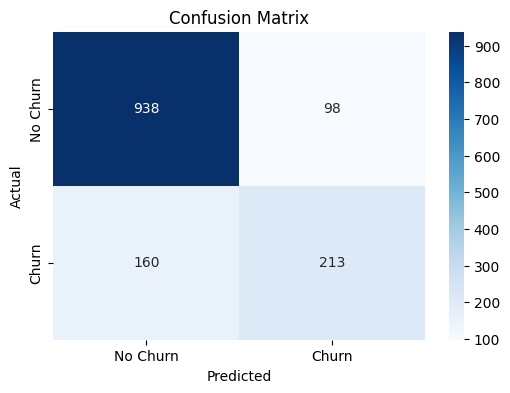

In [264]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


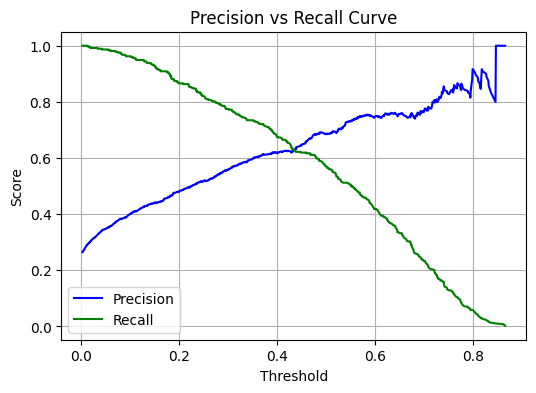

In [265]:
from sklearn.metrics import precision_recall_curve

# প্রোবাবিলিটি প্রেডিকশন
y_probs = model.predict_proba(X_test)[:, 1]

# Precision, Recall এবং Threshold বের করা
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# প্লট করা
plt.figure(figsize=(6, 4))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision vs Recall Curve')
plt.legend()
plt.grid()
plt.show()


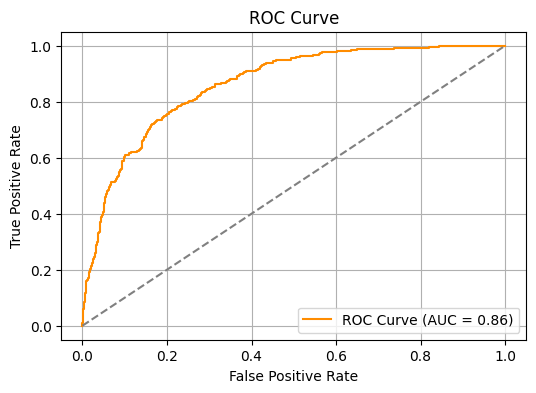

In [266]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC ক্যালকুলেশন
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# প্লট করা
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


## RandomForestClassifier

In [267]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

# Accuracy 
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

# Confution matrix 
cm=confusion_matrix(y_test,y_pred)
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


0.8005677785663591
[[945  91]
 [190 183]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.49      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



## SVM

In [268]:
from sklearn.svm import SVC
model=SVC(probability=True)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

# Accuracy 
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

# Confution matrix 
cm=confusion_matrix(y_test,y_pred)
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

0.7352732434350603
[[1036    0]
 [ 373    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



/home/pervezhasan/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pervezhasan/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/pervezhasan/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Classifiers dictionary
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

# Store results
results = []

# Evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by="F1 Score", ascending=False)


/home/pervezhasan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/pervezhasan/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.818311,0.678899,0.595174,0.634286,0.862510
4,Naive Bayes,0.696948,0.461648,0.871314,0.603528,0.837890
1,Random Forest,0.802697,0.671480,0.498660,0.572308,0.843583
5,Decision Tree,0.712562,0.462264,0.525469,0.491844,0.652696
3,KNN,0.726757,0.472222,0.273458,0.346350,0.625343
2,SVM,0.735273,0.000000,0.000000,0.000000,0.818727


#  Best Model Selection এবং Final Model Save

In [273]:
# F1 Score অনুযায়ী সেরা মডেল বাছাই
best_model_info = results_df.sort_values(by='F1 Score', ascending=False).iloc[0]
best_model_name = best_model_info['Model']
print(f"📌 Best Model based on F1 Score: {best_model_name}")


📌 Best Model based on F1 Score: Logistic Regression


### সেই মডেল পুনরায় ট্রেইন করে ফাইনাল মডেল সংরক্ষণ

In [274]:
import joblib

# সেরা মডেল আবার ট্রেইন করা
best_model = classifiers[best_model_name]
best_model.fit(X_train, y_train)

# মডেল সংরক্ষণ
joblib.dump(best_model, f"{best_model_name.replace(' ', '_').lower()}_telco_model.pkl")
print("✅ Final model saved successfully.")


✅ Final model saved successfully.


/home/pervezhasan/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [276]:
##সংরক্ষিত মডেল পুনরায় লোড করে প্রেডিকশন (চেক করার জন্য)

In [275]:
# লোড করা
loaded_model = joblib.load(f"{best_model_name.replace(' ', '_').lower()}_telco_model.pkl")

# প্রেডিকশন
sample_prediction = loaded_model.predict(X_test[:5])
print("📦 Sample Prediction:", sample_prediction)


📦 Sample Prediction: [1 0 0 1 0]


In [277]:
# Final Pipeline 

In [ ]:
# Industry 

📁 telco_churn_project/
├── main.py                        # প্রধান রান করার ফাইল
├── config.yaml                   # কনফিগারেশন
├── requirements.txt             # প্রয়োজনীয় লাইব্রেরি
├── 📁 src/
│   ├── __init__.py
│   ├── data_loader.py           # CSV লোড করা
│   ├── preprocessing.py         # প্রিপ্রসেসিং ও ফিচার ইঞ্জিনিয়ারিং
│   ├── model_train.py           # মডেল ট্রেনিং ও ইভালুয়েশন
│   ├── utils.py                 # Utility functions
├── 📁 models/                    # Trained মডেল সেভ হবে এখানে
├── 📁 logs/                      # লগ ফাইল


In [280]:
# Data Loder 

In [283]:
# src/data_loader.py
import pandas as pd
import logging


def load_data(file_path):
    """
    Load dataset from a CSV file.
    """
    try:
        df = pd.read_csv(file_path)
        logging.info(f"Data loaded successfully from {file_path}")
        return df
    except FileNotFoundError:
        logging.error(f"File not found: {file_path}")
        raise
    except Exception as e:
        logging.error(f"Error loading data: {e}")
        raise


In [284]:
# src/preprocessing.py
import pandas as pd
import numpy as np
import logging


def clean_target(df, target_column='Churn'):
    df[target_column] = df[target_column].replace({'Yes': 1, 'No': 0})
    return df


def split_customer_id(df):
    split_cols = df['customerID'].str.extract(r'(?P<numeric_part>\d+)(?P<alphabetic_part>\D*)')
    df = df.drop(columns=['customerID'])
    return pd.concat([df, split_cols], axis=1)


def binary_encode(df):
    mappings = {
        'gender': {'Male': 0, 'Female': 1},
        'Partner': {'Yes': 0, 'No': 1},
        'Dependents': {'Yes': 0, 'No': 1},
        'PhoneService': {'Yes': 0, 'No': 1},
        'PaperlessBilling': {'Yes': 0, 'No': 1},
    }
    for col, mapping in mappings.items():
        if col in df.columns:
            df[col] = df[col].map(mapping)
    return df


def one_hot_encode(df):
    categorical_cols = [
        'StreamingMovies', 'StreamingTV', 'DeviceProtection',
        'TechSupport', 'InternetService', 'MultipleLines',
        'OnlineSecurity', 'Contract', 'PaymentMethod', 'OnlineBackup'
    ]
    return pd.get_dummies(df, columns=[col for col in categorical_cols if col in df.columns])


def convert_numeric(df):
    for col in ['TotalCharges', 'numeric_part']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df.drop(columns=['alphabetic_part'], errors='ignore')


def preprocess_pipeline(df):
    logging.info("Starting preprocessing pipeline")
    df = clean_target(df)
    df = split_customer_id(df)
    df = binary_encode(df)
    df = one_hot_encode(df)
    df = convert_numeric(df)
    logging.info("Preprocessing completed")
    return df


In [285]:
# src/model_train.py
import logging
import os
import joblib
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


def split_data(df, target='Churn', test_size=0.2, random_state=42):
    X = df.drop(columns=[target])
    y = df[target]
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


def train_model(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    logging.info("Model trained successfully")
    return model


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    logging.info(f"Accuracy: {acc:.4f}")
    logging.info("Classification Report:\n" + report)
    return acc, report


def save_model(model, model_dir="models"):
    os.makedirs(model_dir, exist_ok=True)
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    file_path = os.path.join(model_dir, f"rf_model_{timestamp}.pkl")
    joblib.dump(model, file_path)
    logging.info(f"Model saved at: {file_path}")
    return file_path


In [286]:
import yaml
import joblib
import logging
from datetime import datetime

from src.data_loader import load_data
from src.preprocessing import preprocess_data
from src.model_train import train_and_evaluate_models, select_and_save_best_model

# Logging সেটআপ
logging.basicConfig(filename='logs/pipeline.log', level=logging.INFO,
                    format='%(asctime)s:%(levelname)s:%(message)s')

def main():
    logging.info("📦 Pipeline started")

    # Config লোড
    with open("config.yaml", "r") as f:
        config = yaml.safe_load(f)

    # ডেটা লোড
    df = load_data(config["data_path"])
    logging.info("✅ Data loaded")

    # প্রিপ্রসেসিং
    X_train, X_test, y_train, y_test = preprocess_data(df, config)
    logging.info("✅ Preprocessing done")

    # মডেল ট্রেনিং ও ইভালুয়েশন
    results_df, models = train_and_evaluate_models(X_train, X_test, y_train, y_test)
    logging.info(f"\n{results_df}")

    # বেস্ট মডেল নির্বাচন ও সংরক্ষণ
    select_and_save_best_model(results_df, models, X_train, y_train)
    logging.info("✅ Best model saved")

if __name__ == "__main__":
    main()


ModuleNotFoundError: No module named 'src'

In [287]:
# config.yaml

data_path: "data/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# আপনি চাইলে future parameters এখানে যোগ করতে পারেন
model_output_path: "models/"
test_size: 0.2
random_state: 42


In [288]:
# requirements.txt
pandas
numpy
scikit-learn
matplotlib
seaborn
pyyaml
joblib


NameError: name 'pandas' is not defined

✅ পরবর্তী ধাপ
✅ src/ ফোল্ডারে ৩টি ফাইল থাকবে:

data_loader.py

preprocessing.py

model_train.py

✅ data/ ফোল্ডারে CSV ফাইল রাখবে

✅ models/ ও logs/ ফোল্ডার তৈরি করে রাখবে